<h1>The Relationship Between Prominence of Brands in Popular Music and Their Success</h1>
Philip Alexander

<h2>Introduction</h2>
In a deeply consumeristic society such as our own, it is no
surprise that the brands that are either present in our everyday lives, or want to be, are represented in our music through verbal mentions. Whether these are the result of genuine relation to the narrative the artist is telling, a brand deal, or simple braggadocio, one would find it difficult to find an album of a popular RNB or Rap artist without namedropping a designer label.

To examine how brand popularity with artists can alter
consumer behavior (or vice versa) we will attempt to find
a relationship between recent references in popular music of the main subsidiaries of Kering, a luxury brand conglomerate, to their financial success.

<h2>Data Collection</h2>
<h3>Determining What Music is Popular</h3>
<a href = 'www.billboard.com/charts'>Billboard's charts</a> are the authoritative source on what music is commercially
succesful across genres. They provide lists that rank the
best performing songs in different time periods in different
genres with different methodoligies. We will be making the
most use out of the year-end Hot 100's, which are the 100 most popular songs from any genre for a given year in America when granting some weight to each of streaming, radio, and sales.
<h3>Determining Lyrical Content</h3>
<a href = 'genius.com'>Genius</a> is a site that hosts the lyrics to pretty much any song released commercially within the United States. There
are API allows us to search for a link a page to these lyrics given a track title and/or an artist. Luckily we
can use a wrapper module of this API to scrape the lyrics
at this link for us.
<h3>Determining Financal Success</h3>
Unfortunately, I could not find a way to programmatical retrieve the revenue generated individual subsidaries of Kering. In Lieu of this, I manually gathered the end of
year revenue from 2010 to 2019 and proportion of this revenue from North America for 3 subsidaries: Gucci, Bottega Veneta, and Yves Saint Laurent.

In [9]:
!pip install lyricsgenius
!pip install billboard.py
import lyricsgenius
import billboard
from collections import Counter
import string
import numpy as np
import pandas as pd

In [10]:
# Our genius api token. If this token stops working for you, take one from here https://docs.genius.com/#annotations-h2
token = 'UG3mE7O-f2RKGCJYi6XKRvFGbAewVjjPIkrCdUixbe7WMnI7V-TURQElvKfg3xX3'
genius = lyricsgenius.Genius(token)

In [40]:
# Here is an example of using the library. 
# Here we gather all unique words in Cardi B's Bodak Yellow that are 3+ letters
# and capitalized, which would theoritically pull any brand names from the Song
genius.verbose = True
genius.remove_section_headers = True
song = genius.search_song(title='Bodak Yellow Money Moves', artist='Cardi B', get_full_info = False)
uni = set(word for word in song.lyrics.translate(str.maketrans('', '', string.punctuation)).split() if word[0].isupper())
print(uni)

Searching for "Bodak Yellow Money Moves" by Cardi B...
Done.
{'Say', 'If', 'Account', 'Ms', 'Yadadadadadada', 'Broke', 'Yellow', 'Bank', 'Yeah', 'Said', 'Dumb', 'And', 'Savage', 'Hit', 'These', 'You', 'Triple', 'See', 'Lacoste', 'I', 'Khalid', 'Young', 'Harleys', 'Moncler', 'One', 'Wooah', 'Ready', 'With', 'Yadadadadadadada', 'Cause', 'Cardi', 'In', 'Mixed', 'Im', 'Guccid', 'B', 'God', 'Raris', 'Got', 'Bodak', 'Lil'}


In [11]:
# The revenue for three subsidiaries of interest across 2010 to 2019
# will be stored in dataframes.
# Gucci earnings
g_earn = pd.read_csv('GucciGroup/Gucci.csv')
# Bottega earnings
b_earn = pd.read_csv('GucciGroup/Bottega.csv')
# Yves Saint Laurent earnings
s_earn = pd.read_csv('GucciGroup/Saint Laurent.csv')
g_earn


,Year,Revenue (Million Euros),NA Proportion
0,2010,2666,0.18
1,2011,3143,0.18
2,2012,3639,0.19
3,2013,3561,0.20
4,2014,3497,0.20
5,2015,3898,0.22
6,2016,4378,0.21
7,2017,6211,0.21
8,2018,8285,0.21
9,2019,9628,0.20


In [14]:
genius.verbose = False
genius.remove_section_headers = True
guc_mentions = [0]*10
bot_mentions = [0]*10
ysl_mentions = [0]*10

err_count = 0

for year in range(2010,2020):
  print('Scrawling through Hot 100 of', year)
  frq_lst = Counter()
  chart = billboard.ChartData('hot-100-songs', year=year)
  for pos in chart:
    song = genius.search_song(title=pos.title, artist=pos.artist, get_full_info = False)
    if not song:
      song = genius.search_song(title=pos.title.split(' ')[0], artist=pos.artist.split(' ')[-1], get_full_info = False)
    if song:
      if 'Bottega' in song.lyrics or 'Veneta' in Song.lyrics:
        bot_mentions[year-2010]+=1
      if 'YSL' in sing.lyrics or 'Laurent' in Song.Lyrics
        ysl_mentions[year-2010]+=1
      if 'Gucci' in song.lyrics:
        guc_mentions[year-2010]+=1
    # Unfortunately, due to the variety of ways to format artists, features, &
    # titles, not every song of the 1000 we analyze can be captured.
    elif not song:
      print('problem with', pos)
      err_count+=1

print('Error Count:', err_count)
#print('Total Occurences:', total_count)

Scrawling through Hot 100 of 2010
Scrawling through Hot 100 of 2011
problem with 'F**kin' Perfect' by P!nk
Scrawling through Hot 100 of 2012
Scrawling through Hot 100 of 2013
problem with 'Boys 'round Here' by Blake Shelton Featuring Pistol Annies & Friends
Scrawling through Hot 100 of 2014
Scrawling through Hot 100 of 2015
Scrawling through Hot 100 of 2016
Scrawling through Hot 100 of 2017
Scrawling through Hot 100 of 2018
Scrawling through Hot 100 of 2019
Error Count: 2


<h3>Data Collection Results</h3>
Now we have the financial data and lyrical popularity for each of the the three labels this past decade.

In [17]:
# Add mentions to the tables
g_earn['Mentions'] = guc_mentions
b_earn['Mentions'] = bot_mentions
s_earn['Mentions'] = ysl_mentions
g_earn

,Year,Revenue (Million Euros),NA Proportion,Mentions
0,2010,2666,0.18,1
1,2011,3143,0.18,1
2,2012,3639,0.19,0
3,2013,3561,0.20,2
4,2014,3497,0.20,1
5,2015,3898,0.22,0
6,2016,4378,0.21,2
7,2017,6211,0.21,8
8,2018,8285,0.21,9
9,2019,9628,0.20,7


<h2>Initial Analysis</h2>

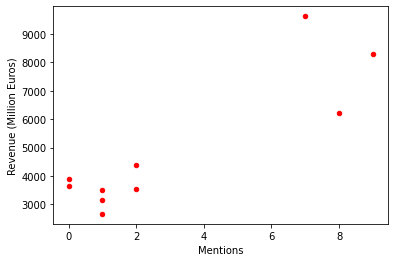

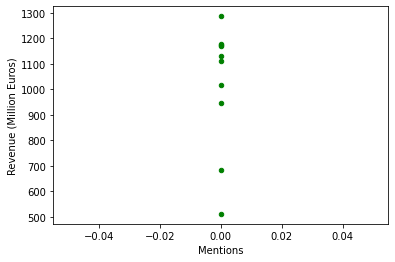

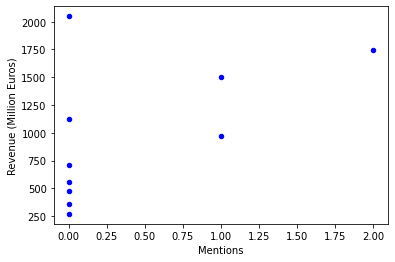

In [19]:
import matplotlib.pyplot as plt
g_earn.plot(kind='scatter',x='Mentions',y='Revenue (Million Euros)', color = 'red')
b_earn.plot(kind='scatter',x='Mentions',y='Revenue (Million Euros)', color='green')
s_earn.plot(kind='scatter',x='Mentions',y='Revenue (Million Euros)', color='blue')
plt.show()

<H>